In [1]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn style
sns.set(style="whitegrid")

In [25]:
import numpy as np

In [41]:
gm_df = pd.read_csv("../data/output/agences_reviews_20220414.csv",sep = ";", encoding = "utf-8")

In [42]:
gm_df

,author_name,user_rating,text,review_date,place_id,address,phone_number,website
0,imane mb,5,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci,2022-02-16,ChIJKyi768Zl5kcRxMYLyp4CB0k,"1 Pl. du Général Leclerc, 92700 Colombes, France",+33 1 71 09 61 03,https://www.agences.caisse-epargne.fr/banque-assurance/colombes-id17515000059
1,Kevina Lopes Martins,1,"Un manque de professionnalisme flagrant !!\nPersonnel hautain et condescendant au téléphone.\nElle ne répond pas à mes demandes, et me répondait comme ci ce que je demandais était logique pour tout le monde, je vous déconseille cette banque. A fuir.",2022-02-12,ChIJKyi768Zl5kcRxMYLyp4CB0k,"1 Pl. du Général Leclerc, 92700 Colombes, France",+33 1 71 09 61 03,https://www.agences.caisse-epargne.fr/banque-assurance/colombes-id17515000059
2,Abdel Yezli,5,Mme Labed est une super directrice à l'écoute. Elle a su prendre en compte mes demandes tout en prenant en compte mes inquiétudes.\nSes conseils sont utiles et son accompagnement est au top !\nMerci à elle pour sa réactivité et son professionnalisme.,2022-01-16,ChIJKyi768Zl5kcRxMYLyp4CB0k,"1 Pl. du Général Leclerc, 92700 Colombes, France",+33 1 71 09 61 03,https://www.agences.caisse-epargne.fr/banque-assurance/colombes-id17515000059
3,Kinane Djebli,1,"0 professionnalisme ! Une banque à fuir. Dommage que je soit obligé de mettre une étoile car une étoile est au dessus de leurs compétences.\nChangement de carte sans demande de consentement, conseillé qui changent tout le temps, conseillés inexistants, personnes chargé de l’appel incompétentes. En plus de ça Manque de respect, banque en retard sur leurs concurrent d’ailleurs.\nMême les banques en ligne sont plus compétentes.\nJe vais littéralement changé de banque !\nUn conseil ? FUYEZ !!!!",2021-11-27,ChIJKyi768Zl5kcRxMYLyp4CB0k,"1 Pl. du Général Leclerc, 92700 Colombes, France",+33 1 71 09 61 03,https://www.agences.caisse-epargne.fr/banque-assurance/colombes-id17515000059
4,Chrisley Princivil,1,"Si j’avais pu mettre 0 je l’aurais fait. Une agence dont l’équipe se fiche complètement de ses clients. Un service des plus désagréable, traitement des dossiers long, aucune amabilité. Ils vous disent qu’ils vont vous rappeler et ne rappelle jamais! Je suis tombé UNE FOIS sur M. Jean-Marc Mbonjo qui lui était au moins une l’écoute et disposé à m’apporter la meilleure solution, mais malheureusement le reste de l’équipe ne suit pas! A éviter!",2022-02-11,ChIJKyi768Zl5kcRxMYLyp4CB0k,"1 Pl. du Général Leclerc, 92700 Colombes, France",+33 1 71 09 61 03,https://www.agences.caisse-epargne.fr/banque-assurance/colombes-id17515000059
...,...,...,...,...,...,...,...,...
26113,Abel Rocha,1,A fuir absolument a se demander si les magouilles et l'impolitesse et de rigueur chez eux. Je vous recommande d'aller au crédit agricole bien plus professionnel.,2020-12-22,ChIJVT8J2MqJUw0RZ87ztLpove4,"5 Av. de Bordeaux, 40200 Mimizan, France",+33 5 58 04 42 80,https://www.bpaca.banquepopulaire.fr/
26114,Cedric BERGER,5,Petite par la taille mais grande par l efficacité. Bravo !!! Djo Duck,2021-07-01,ChIJx4b94Vqa9UcRs9d4ZDJchmM,"13 Rue de Saint-Agrève, 43190 Tence, France",+33 4 71 59 53 98,https://www.agences.caisse-epargne.fr/banque-assurance/tence-id18715000863
26115,Angie Madison,2,"Conseillère certes a l'heure mais n'a pas préparé le rendez-vous. La regarder taper sur son ordinateur malmener son imprimante et hésiter 25 minutes sur un sujet que je pense toute conseillère bancaire devrais connaître, ne devrait pas faire parti du rendez-vous.\n20% de conversation et 80% d'hésitation.",2019-05-30,ChIJRVA6MramFkgRQFxyN3roDvY,"2 Pl. de l'Auditoire, 29870 Lannilis, France",+33 2 57 29 04 84,https://www.agences.caisse-epargne.fr/banque-assurance

In [43]:
gm_df.columns

Index(['author_name', 'user_rating', 'text', 'review_date', 'place_id',
       'address', 'phone_number', 'website'],
      dtype='object')

In [50]:
revs_df = gm_df[['place_id', 'user_rating', 'text', 'review_date']]

In [51]:
revs_df

,place_id,user_rating,text,review_date
0,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci,2022-02-16
1,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Un manque de professionnalisme flagrant !!\nPersonnel hautain et condescendant au téléphone.\nElle ne répond pas à mes demandes, et me répondait comme ci ce que je demandais était logique pour tout le monde, je vous déconseille cette banque. A fuir.",2022-02-12
2,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mme Labed est une super directrice à l'écoute. Elle a su prendre en compte mes demandes tout en prenant en compte mes inquiétudes.\nSes conseils sont utiles et son accompagnement est au top !\nMerci à elle pour sa réactivité et son professionnalisme.,2022-01-16
3,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"0 professionnalisme ! Une banque à fuir. Dommage que je soit obligé de mettre une étoile car une étoile est au dessus de leurs compétences.\nChangement de carte sans demande de consentement, conseillé qui changent tout le temps, conseillés inexistants, personnes chargé de l’appel incompétentes. En plus de ça Manque de respect, banque en retard sur leurs concurrent d’ailleurs.\nMême les banques en ligne sont plus compétentes.\nJe vais littéralement changé de banque !\nUn conseil ? FUYEZ !!!!",2021-11-27
4,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Si j’avais pu mettre 0 je l’aurais fait. Une agence dont l’équipe se fiche complètement de ses clients. Un service des plus désagréable, traitement des dossiers long, aucune amabilité. Ils vous disent qu’ils vont vous rappeler et ne rappelle jamais! Je suis tombé UNE FOIS sur M. Jean-Marc Mbonjo qui lui était au moins une l’écoute et disposé à m’apporter la meilleure solution, mais malheureusement le reste de l’équipe ne suit pas! A éviter!",2022-02-11
...,...,...,...,...
26113,ChIJVT8J2MqJUw0RZ87ztLpove4,1,A fuir absolument a se demander si les magouilles et l'impolitesse et de rigueur chez eux. Je vous recommande d'aller au crédit agricole bien plus professionnel.,2020-12-22
26114,ChIJx4b94Vqa9UcRs9d4ZDJchmM,5,Petite par la taille mais grande par l efficacité. Bravo !!! Djo Duck,2021-07-01
26115,ChIJRVA6MramFkgRQFxyN3roDvY,2,"Conseillère certes a l'heure mais n'a pas préparé le rendez-vous. La regarder taper sur son ordinateur malmener son imprimante et hésiter 25 minutes sur un sujet que je pense toute conseillère bancaire devrais connaître, ne devrait pas faire parti du rendez-vous.\n20% de conversation et 80% d'hésitation.",2019-05-30
26116,ChIJ1zyqqT8RB0gRu-8sG7ipxxU,2,Conseil trop succinct.\nLa gentillesse ne fait pas le professionnalisme.,2020-07-03


In [52]:
chars_len = revs_df['text'].str.len()

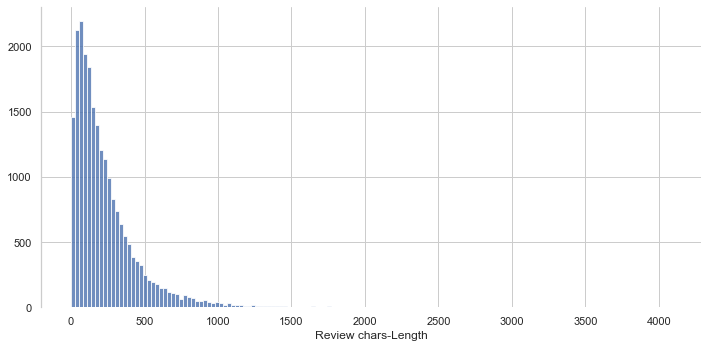

In [48]:
plt.figure(figsize=(10,5))
ax = sns.distplot(chars_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review chars-Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('../data/reviews_chars_length.png', dpi=200)

In [53]:
words_len = revs_df['text'].apply(lambda x: len(str(x).split(' ')))

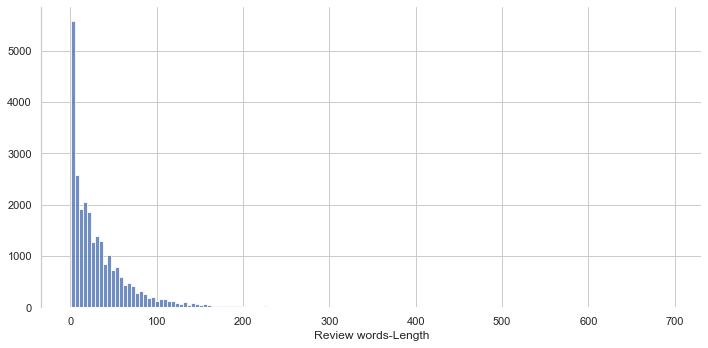

In [49]:
plt.figure(figsize=(10,5))
ax = sns.distplot(words_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review words-Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('../data/reviews_words_length.png', dpi=200)

In [54]:
revs_df['chars_len'] = revs_df['text'].str.len()

C:\Users\BENREKIA\AppData\Local\Temp/ipykernel_20684/1918907064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revs_df['chars_len'] = revs_df['text'].str.len()


In [55]:
revs_df

,place_id,user_rating,text,review_date,chars_len
0,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci,2022-02-16,337.0
1,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Un manque de professionnalisme flagrant !!\nPersonnel hautain et condescendant au téléphone.\nElle ne répond pas à mes demandes, et me répondait comme ci ce que je demandais était logique pour tout le monde, je vous déconseille cette banque. A fuir.",2022-02-12,247.0
2,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mme Labed est une super directrice à l'écoute. Elle a su prendre en compte mes demandes tout en prenant en compte mes inquiétudes.\nSes conseils sont utiles et son accompagnement est au top !\nMerci à elle pour sa réactivité et son professionnalisme.,2022-01-16,248.0
3,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"0 professionnalisme ! Une banque à fuir. Dommage que je soit obligé de mettre une étoile car une étoile est au dessus de leurs compétences.\nChangement de carte sans demande de consentement, conseillé qui changent tout le temps, conseillés inexistants, personnes chargé de l’appel incompétentes. En plus de ça Manque de respect, banque en retard sur leurs concurrent d’ailleurs.\nMême les banques en ligne sont plus compétentes.\nJe vais littéralement changé de banque !\nUn conseil ? FUYEZ !!!!",2021-11-27,491.0
4,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Si j’avais pu mettre 0 je l’aurais fait. Une agence dont l’équipe se fiche complètement de ses clients. Un service des plus désagréable, traitement des dossiers long, aucune amabilité. Ils vous disent qu’ils vont vous rappeler et ne rappelle jamais! Je suis tombé UNE FOIS sur M. Jean-Marc Mbonjo qui lui était au moins une l’écoute et disposé à m’apporter la meilleure solution, mais malheureusement le reste de l’équipe ne suit pas! A éviter!",2022-02-11,444.0
...,...,...,...,...,...
26113,ChIJVT8J2MqJUw0RZ87ztLpove4,1,A fuir absolument a se demander si les magouilles et l'impolitesse et de rigueur chez eux. Je vous recommande d'aller au crédit agricole bien plus professionnel.,2020-12-22,161.0
26114,ChIJx4b94Vqa9UcRs9d4ZDJchmM,5,Petite par la taille mais grande par l efficacité. Bravo !!! Djo Duck,2021-07-01,70.0
26115,ChIJRVA6MramFkgRQFxyN3roDvY,2,"Conseillère certes a l'heure mais n'a pas préparé le rendez-vous. La regarder taper sur son ordinateur malmener son imprimante et hésiter 25 minutes sur un sujet que je pense toute conseillère bancaire devrais connaître, ne devrait pas faire parti du rendez-vous.\n20% de conversation et 80% d'hésitation.",2019-05-30,304.0
26116,ChIJ1zyqqT8RB0gRu-8sG7ipxxU,2,Conseil trop succinct.\nLa gentillesse ne fait pas le professionnalisme.,2020-07-03,71.0


In [56]:
revs_df['words_len'] = revs_df['text'].apply(lambda x: len(str(x).split(' '))) 

C:\Users\BENREKIA\AppData\Local\Temp/ipykernel_20684/3789490459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revs_df['words_len'] = revs_df['text'].apply(lambda x: len(str(x).split(' ')))


In [57]:
revs_df

,place_id,user_rating,text,review_date,chars_len,words_len
0,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci,2022-02-16,337.0,67
1,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Un manque de professionnalisme flagrant !!\nPersonnel hautain et condescendant au téléphone.\nElle ne répond pas à mes demandes, et me répondait comme ci ce que je demandais était logique pour tout le monde, je vous déconseille cette banque. A fuir.",2022-02-12,247.0,39
2,ChIJKyi768Zl5kcRxMYLyp4CB0k,5,Mme Labed est une super directrice à l'écoute. Elle a su prendre en compte mes demandes tout en prenant en compte mes inquiétudes.\nSes conseils sont utiles et son accompagnement est au top !\nMerci à elle pour sa réactivité et son professionnalisme.,2022-01-16,248.0,41
3,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"0 professionnalisme ! Une banque à fuir. Dommage que je soit obligé de mettre une étoile car une étoile est au dessus de leurs compétences.\nChangement de carte sans demande de consentement, conseillé qui changent tout le temps, conseillés inexistants, personnes chargé de l’appel incompétentes. En plus de ça Manque de respect, banque en retard sur leurs concurrent d’ailleurs.\nMême les banques en ligne sont plus compétentes.\nJe vais littéralement changé de banque !\nUn conseil ? FUYEZ !!!!",2021-11-27,491.0,75
4,ChIJKyi768Zl5kcRxMYLyp4CB0k,1,"Si j’avais pu mettre 0 je l’aurais fait. Une agence dont l’équipe se fiche complètement de ses clients. Un service des plus désagréable, traitement des dossiers long, aucune amabilité. Ils vous disent qu’ils vont vous rappeler et ne rappelle jamais! Je suis tombé UNE FOIS sur M. Jean-Marc Mbonjo qui lui était au moins une l’écoute et disposé à m’apporter la meilleure solution, mais malheureusement le reste de l’équipe ne suit pas! A éviter!",2022-02-11,444.0,74
...,...,...,...,...,...,...
26113,ChIJVT8J2MqJUw0RZ87ztLpove4,1,A fuir absolument a se demander si les magouilles et l'impolitesse et de rigueur chez eux. Je vous recommande d'aller au crédit agricole bien plus professionnel.,2020-12-22,161.0,26
26114,ChIJx4b94Vqa9UcRs9d4ZDJchmM,5,Petite par la taille mais grande par l efficacité. Bravo !!! Djo Duck,2021-07-01,70.0,14
26115,ChIJRVA6MramFkgRQFxyN3roDvY,2,"Conseillère certes a l'heure mais n'a pas préparé le rendez-vous. La regarder taper sur son ordinateur malmener son imprimante et hésiter 25 minutes sur un sujet que je pense toute conseillère bancaire devrais connaître, ne devrait pas faire parti du rendez-vous.\n20% de conversation et 80% d'hésitation.",2019-05-30,304.0,46
26116,ChIJ1zyqqT8RB0gRu-8sG7ipxxU,2,Conseil trop succinct.\nLa gentillesse ne fait pas le professionnalisme.,2020-07-03,71.0,9


In [68]:
revs_df.groupby(by=["user_rating"])['chars_len'].min()

user_rating
1    1.0
2    3.0
3    3.0
4    2.0
5    1.0
Name: chars_len, dtype: float64

In [76]:
revs_df[revs_df['chars_len']<5]

,place_id,user_rating,text,review_date,chars_len,words_len
3314,ChIJAYAY1i-E50cRuNLaR6JeSJE,5,Bien,2021-09-13,4.0,1
3503,ChIJv3PTtH6BBUgRxuUNnrTEXaY,5,Bien,2021-01-02,4.0,1
3831,ChIJgZgatIp7jEcR3uYKxxiv0og,1,nul,2022-03-16,3.0,1
4936,ChIJdXS3gxGcD0gRr3APfCAPO_s,1,Nul,2022-03-16,3.0,1
5642,ChIJ61cvMaevthIROyMfWYgdDMA,5,Bien,2021-10-12,4.0,1
...,...,...,...,...,...,...
25561,ChIJh7xGG-vY5UcRWqAFXYZIbgI,5,Haut,2022-03-29,4.0,1
25628,ChIJX1XVbPd780cRc2tS3TIfc5I,1,Mort,2014-11-11,4.0,1
25765,ChIJ1efS8LyjBkgRFzo2FO9dM4Q,3,Bien,2021-08-13,4.0,1
25897,ChIJWz8ULafq80cRtwenuCRGX3o,4,Joli,2017-08-19,4.0,1


In [58]:
revs_df.groupby(by=["user_rating"])['words_len'].mean()

user_rating
1    50.045718
2    35.977244
3    20.476676
4    16.023601
5    20.903177
Name: words_len, dtype: float64

In [66]:
biglist= []
for i in range (1,6):
    biglist.append(revs_df[revs_df['user_rating']==i].words_len.to_list())

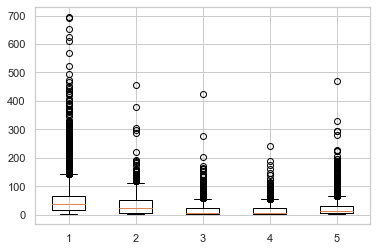

In [67]:
plt.boxplot(biglist)
plt.show() 

# non ascci chars

In [77]:
import re
 
# Function to check string
# is alphanumeric or not
def isAlphaNumeric(str):
 
    # Regex to check string is
    # alphanumeric or not.
    regex = "^(?=.*[a-zA-Z])(?=.*[0-9])[A-Za-z0-9]+$"
 
    # Compile the ReGex
    p = re.compile(regex)
 
    # If the string is empty
    # return false
    if(str == None):
        return False
 
    # Return if the string
    # matched the ReGex
    if(re.search(p, str)):
        return True
    else:
        return False

In [78]:
special_chars = []
for avis in revs_df.text.to_list() :
    special_chars = special_chars + [c for c in str(avis) if not c.isalpha() and not c.isnumeric()]
set(special_chars)

{'\t',
 '\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '\xa0',
 '§',
 '¨',
 '«',
 '°',
 '´',
 '»',
 '̀',
 '́',
 '̂',
 '\u200b',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '\u2028',
 '\u202f',
 '‼',
 '⁉',
 '€',
 '℅',
 '☀',
 '☎',
 '☑',
 '☹',
 '☺',
 '♀',
 '♂',
 '♥',
 '♿',
 '⚜',
 '⚠',
 '⛔',
 '✅',
 '✈',
 '✊',
 '✋',
 '✌',
 '✍',
 '✨',
 '❓',
 '❗',
 '❤',
 '⭐',
 '《',
 '》',
 '\uf04a',
 '️',
 '！',
 '，',
 '：',
 '🆗',
 '🇫',
 '🇷',
 '🌈',
 '🌟',
 '🌸',
 '🌹',
 '🌿',
 '🍀',
 '🍒',
 '🍹',
 '🍾',
 '🎈',
 '🎉',
 '🎊',
 '🎭',
 '🏅',
 '🏆',
 '🏛',
 '🏠',
 '🏦',
 '🏧',
 '🏻',
 '🏼',
 '🏽',
 '🏾',
 '🏿',
 '🐺',
 '🐿',
 '👆',
 '👈',
 '👉',
 '👊',
 '👋',
 '👌',
 '👍',
 '👎',
 '👏',
 '👑',
 '👹',
 '👿',
 '💁',
 '💕',
 '💙',
 '💟',
 '💤',
 '💥',
 '💩',
 '💪',
 '💫',
 '💯',
 '💰',
 '💲',
 '💳',
 '💶',
 '💸',
 '💹',
 '📱',
 '📸',
 '🔆',
 '🔕',
 '🔥',
 '🖒',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😇',
 '😈',
 '😉

In [88]:
special_chars = list(set(special_chars))

In [186]:
filtre = revs_df['text'].apply(lambda x: '́' in str(x))

In [187]:
revs_df[filtre]['text']

14023    Nouveau client depuis le début d’année et très satisfait. Les conseils de mon conseiller (adaptés à mon profil) m’ont permis de réaliser une belle plus-value grâce à la diversification de mon assurance vie. Je recommande.
Name: text, dtype: object

In [188]:
text_1 =  revs_df[filtre]['text'].to_list()

In [189]:
text_1[0].strip()

'Nouveau client depuis le début d’année et très satisfait. Les conseils de mon conseiller (adaptés à mon profil) m’ont permis de réaliser une belle plus-value grâce à la diversification de mon assurance vie. Je recommande.'

In [138]:
len(text_1[0])

794

In [192]:
tst =text_1[0].replace('́','')

In [193]:
tst

'Nouveau client depuis le debut d’annee et très satisfait. Les conseils de mon conseiller (adaptes à mon profil) m’ont permis de realiser une belle plus-value grâce à la diversification de mon assurance vie. Je recommande.'

In [129]:
len(tst)

1839

In [16]:
short_words = {'words':[], 'text':[]}

for avis in text :
    words = str(avis).split(' ')
    
    words_temp = [w for w in words if w.isalpha() and len(w)<3 and w not in short_words['words']]
    short_words['words'] = short_words['words'] + words_temp
    short_words['text'] =  short_words['text'] + [avis]*len(words_temp)


In [18]:
sw_df = pd.DataFrame(short_words)

In [30]:
sw_df

,words,text
0,de,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci
1,ne,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci
2,me,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci
3,du,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci
4,à,Mon conseiller de Colombes (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard. Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait ! Mille merci
...,...,...
435,AS,"De où tu te permet de juger les gens sur leur métier il est où le rapport avec les opération bancaires ? faites attention à qui vous parlez vous êtes une banque on est pas potes ! dîtes à vos conseillés de rester tranquille ça vaut mieux, j'suis le larbin de personne restez professionnel c'est un conseil ! j'ai une patience très limitée quand il s'agit de porter des jugements inutiles et qui n'ont rien avoir avec la demande ! j'ai jamais vu ça mort de rire par contre quand t'es pété au AS y'a plus personne qui te prends la tête là , le respect c'est pour tout le monde , basta ."
436,cq,"Suivant sur la dame que tu tombe, sois cq prend 10 minutes sois 10 ans.. pas toutes competente"
437,ls,lieu que j ai parcouru depuis tt petit ma amatxi habitait rue du commerce amatxi maternelle ai passer des journees a jouer au fronton de tardets ns jouions a la pelote pour moi ls moments le plus important que j ai eu de decouvrir ds milliers d anecdote avec cousines cousins tantes oncles
438,Tb,Tb


In [ ]:
'🏻',
 '🏼',
 '🏽',
 '🏾',
 '🏿',